# HW1

## imports

## Load Data

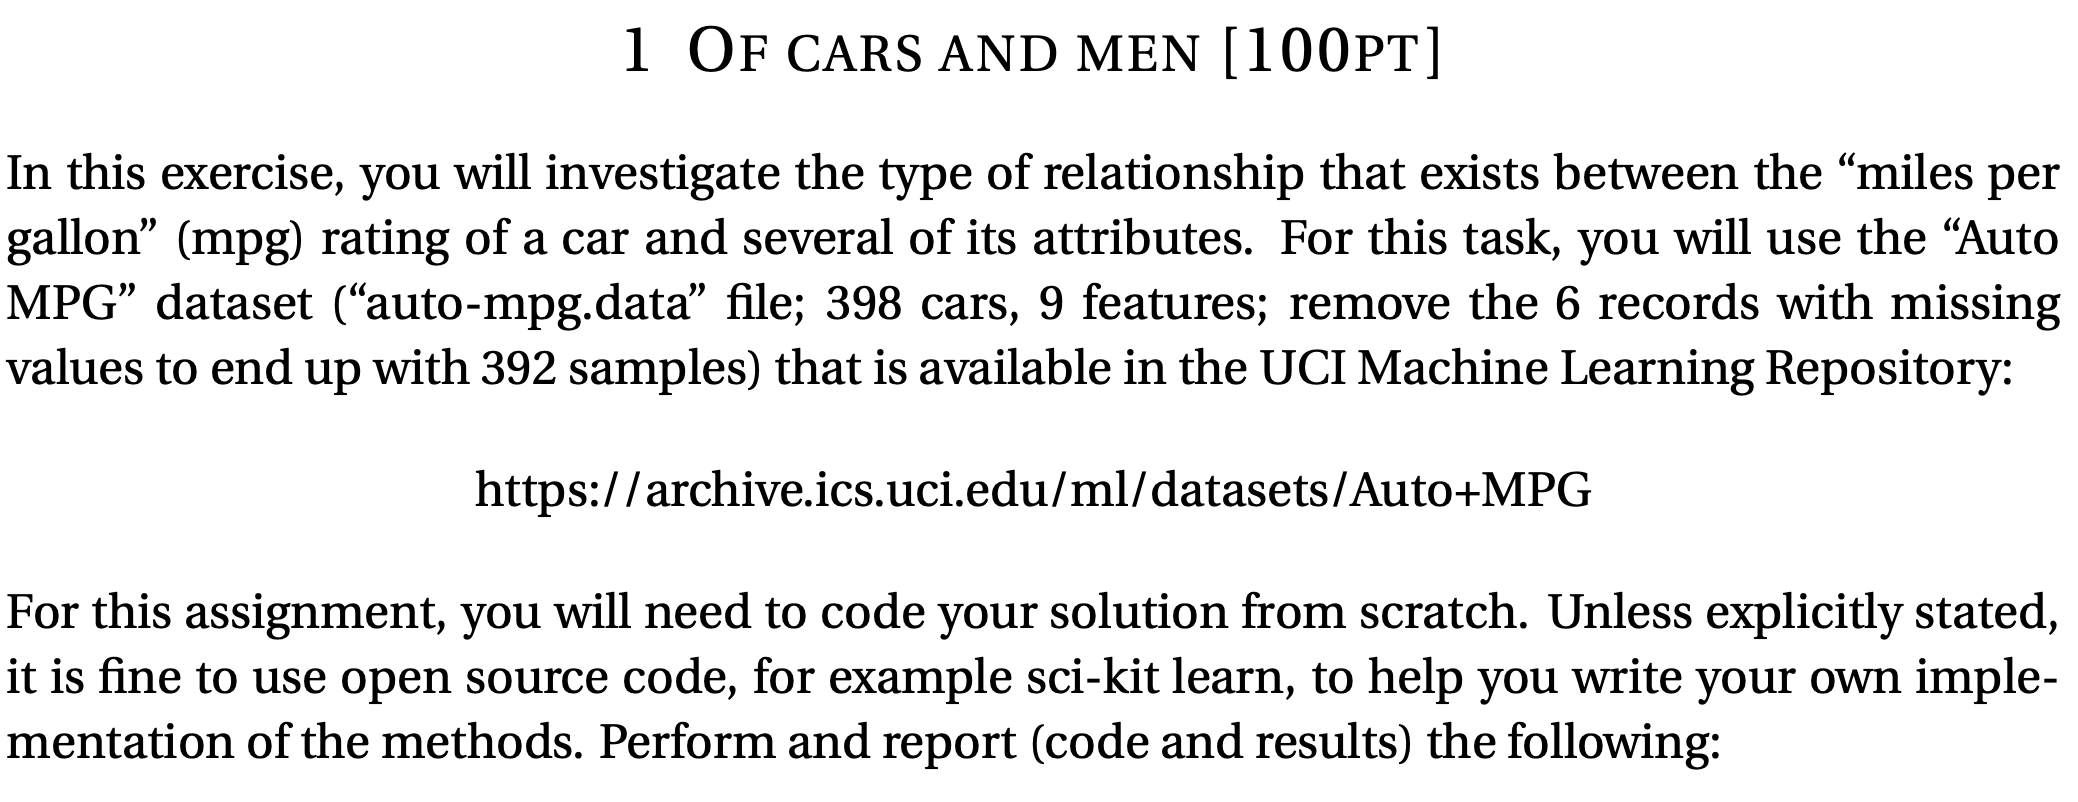

# Exercises

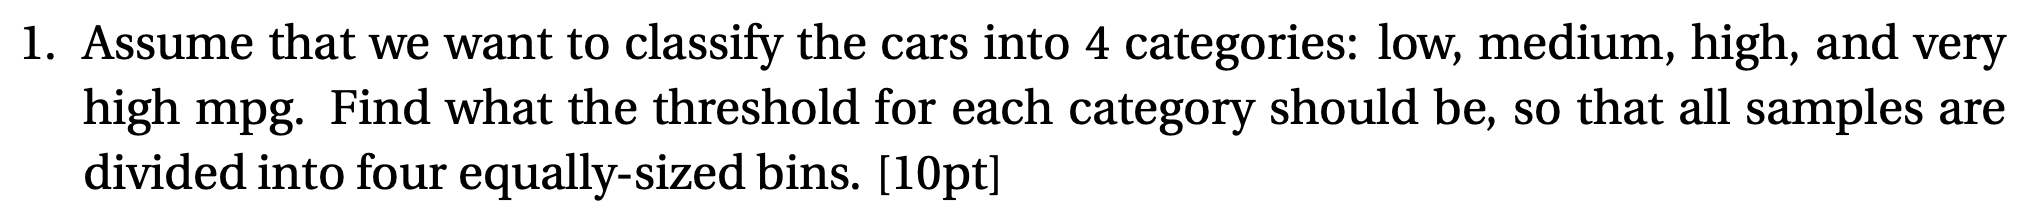

In [1]:
import pandas as pd
import numpy as np

# Load dataset
columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
           'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# Handle missing values (some horsepower are '?')
df = pd.read_csv("auto-mpg.data", delim_whitespace=True, names=columns, na_values='?')
df = df.dropna()

# Compute thresholds (quartiles)
q1, q2, q3 = df['mpg'].quantile([0.25, 0.5, 0.75])

print("Quartile thresholds for mpg:")
print(f"Q1 = {q1:.2f}")
print(f"Q2 = {q2:.2f}")
print(f"Q3 = {q3:.2f}")

# Assign category based on mpg
def mpg_category(mpg):
    if mpg <= q1:
        return "low"
    elif mpg <= q2:
        return "medium"
    elif mpg <= q3:
        return "high"
    else:
        return "very high"

df["mpg_category"] = df["mpg"].apply(mpg_category)

# Show distribution
print(df["mpg_category"].value_counts())


Quartile thresholds for mpg:
Q1 = 17.00
Q2 = 22.75
Q3 = 29.00
mpg_category
high         101
low           99
medium        97
very high     95
Name: count, dtype: int64


/tmp/ipython-input-3149880815.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("auto-mpg.data", delim_whitespace=True, names=columns, na_values='?')


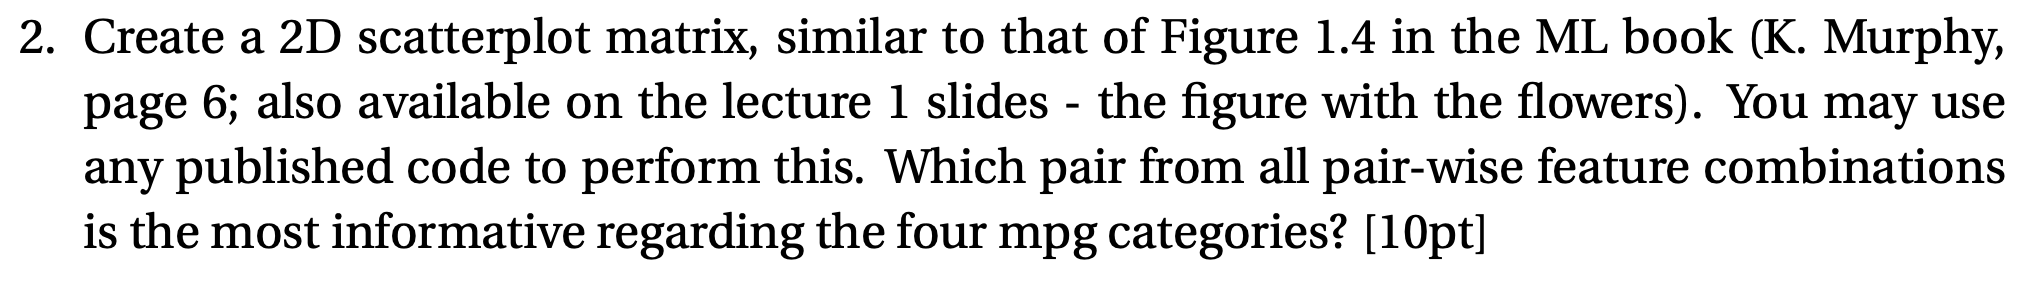

/tmp/ipython-input-2374468463.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


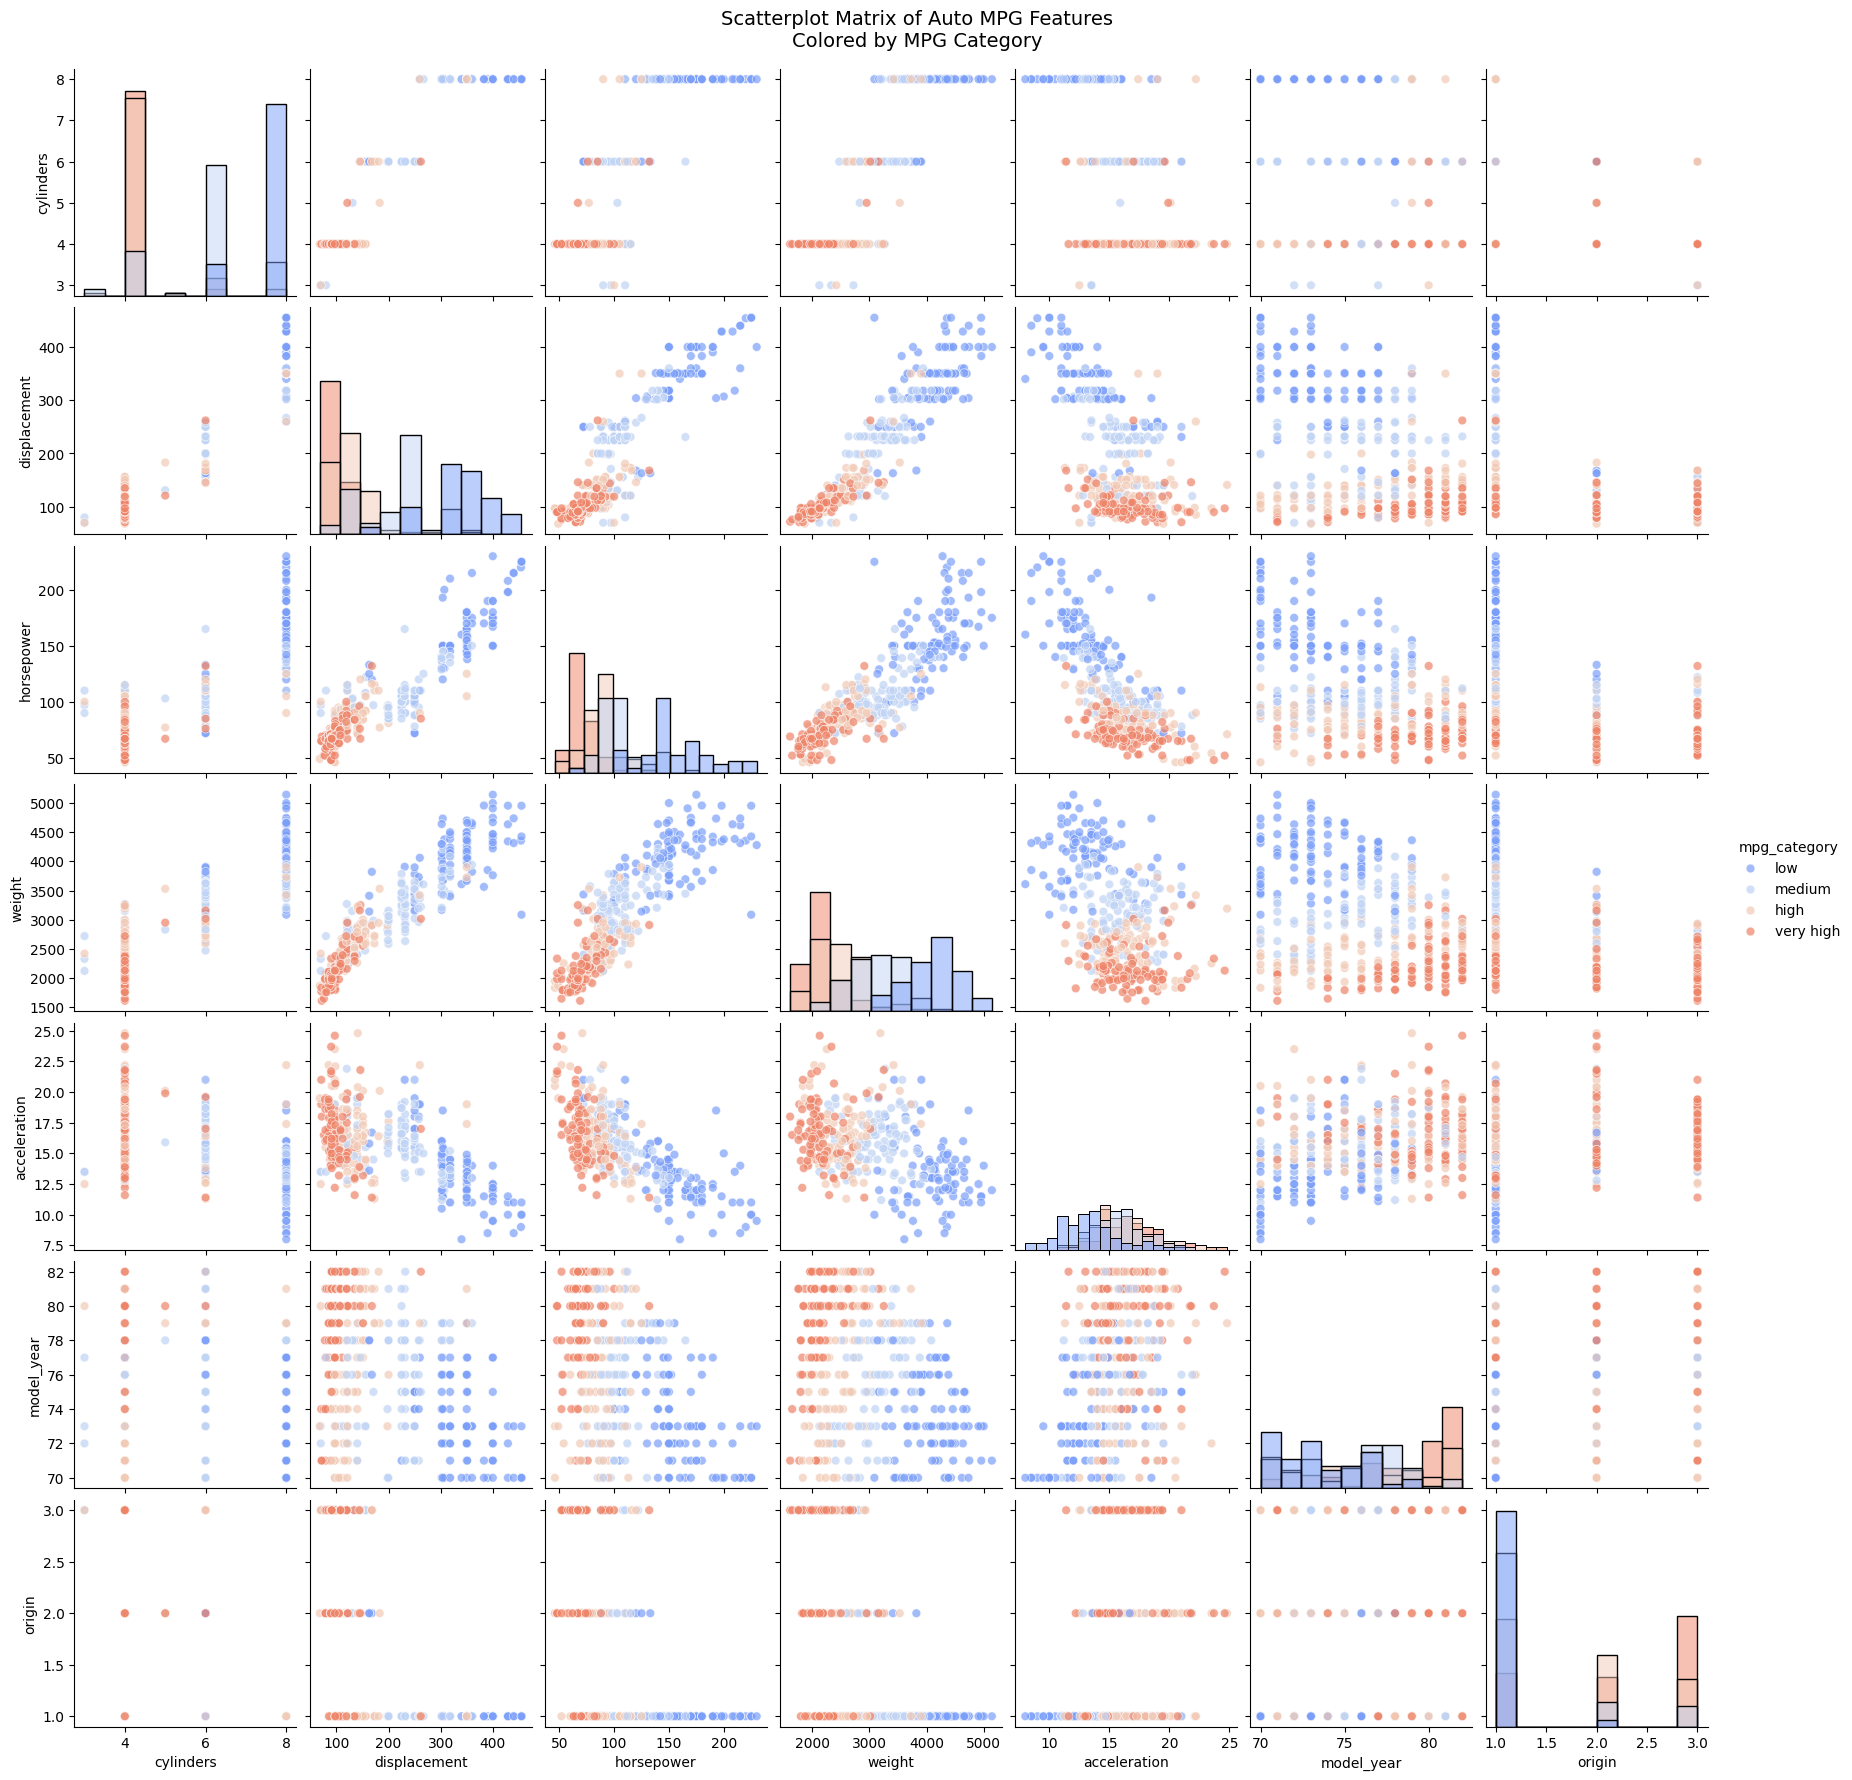

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------------
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

# Read data file (provided as "auto-mpg.data")
# The dataset uses whitespace as a delimiter and '?' for missing values.
data = pd.read_csv(
    "auto-mpg.data",
    delim_whitespace=True,
    names=column_names,
    na_values='?'
)

# Drop rows with missing values (6 total)
data = data.dropna().reset_index(drop=True)

# ------------------------------------------------------------
# 2. Create 4 equally-sized bins for MPG
# ------------------------------------------------------------
# Use qcut to divide mpg into 4 equal-frequency bins
data['mpg_category'] = pd.qcut(
    data['mpg'],
    q=4,
    labels=['low', 'medium', 'high', 'very high']
)

# ------------------------------------------------------------
# 3. Create 2D scatterplot matrix
# ------------------------------------------------------------
# We’ll visualize relationships among numeric features
features = [
    'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin'
]

sns.pairplot(
    data,
    vars=features,
    hue='mpg_category',
    palette='coolwarm',
    diag_kind='hist',
    plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'w'}
)

plt.suptitle(
    "Scatterplot Matrix of Auto MPG Features\nColored by MPG Category",
    y=1.02,
    fontsize=14
)
plt.show()

# ------------------------------------------------------------
# 4. Observation (for report)
# ------------------------------------------------------------
# The clearest separation between categories appears in the
# 'weight' vs 'horsepower' plot — lighter cars with lower horsepower
# have much higher MPG. Thus, this pair is the most informative
# regarding the four MPG categories.


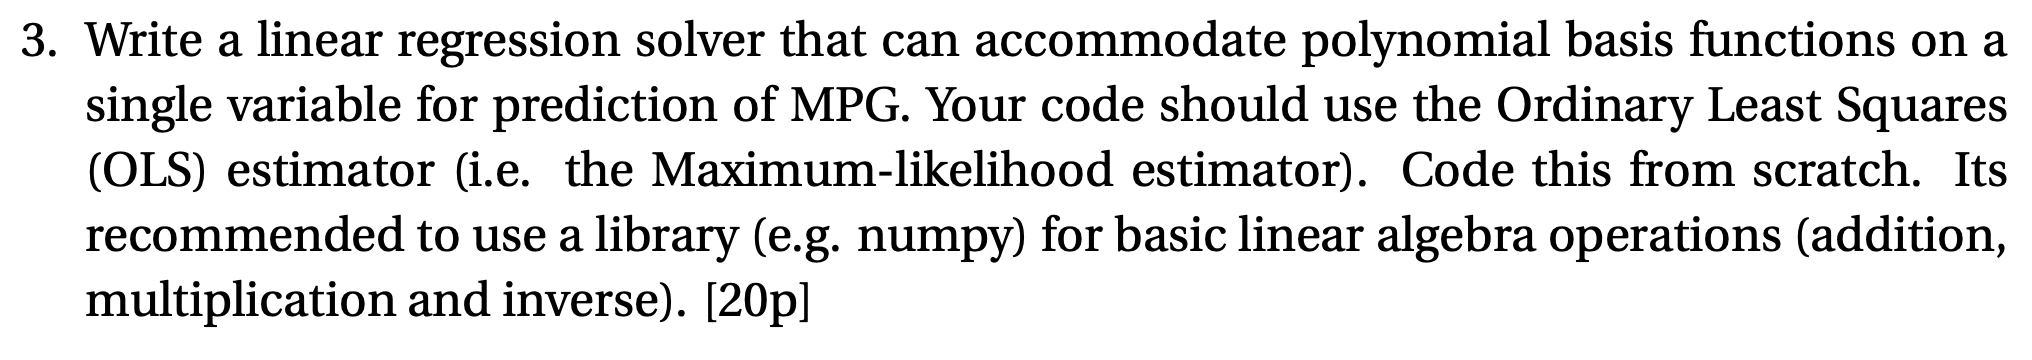

/tmp/ipython-input-1616494958.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


Polynomial degree: 2
Weights: [ 1.44168104e-05  2.21057756e-02 -4.45302124e-06]
Training MSE: 36.55825489406297


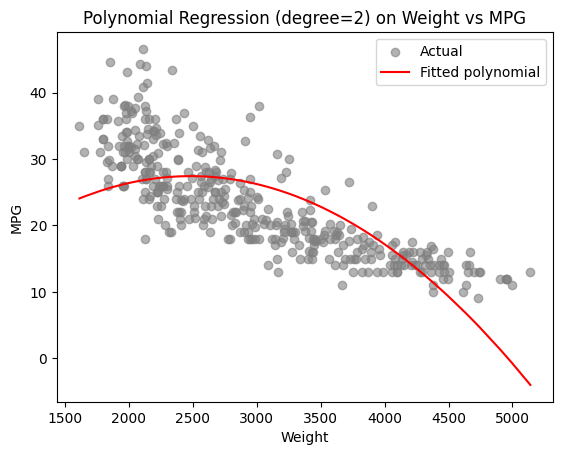

In [3]:
# ============================================================
# ECS 171 – Homework 1
# Question 3: Linear Regression Solver with Polynomial Basis
# ============================================================

import numpy as np
import pandas as pd

# ------------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------------
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

data = pd.read_csv(
    "auto-mpg.data",
    delim_whitespace=True,
    names=column_names,
    na_values='?'
)
data = data.dropna().reset_index(drop=True)

# ------------------------------------------------------------
# 2. Linear Regression with Polynomial Basis (from scratch)
# ------------------------------------------------------------
def polynomial_features(x, degree):
    """
    Given a 1D array x, return the design matrix X
    containing columns [1, x, x^2, ..., x^degree].
    """
    n = len(x)
    X = np.ones((n, degree + 1))
    for d in range(1, degree + 1):
        X[:, d] = x ** d
    return X

def linear_regression_ols(X, y):
    """
    Ordinary Least Squares estimator:
    w = (X^T X)^(-1) X^T y
    """
    # Compute pseudo-inverse in case X^T X is singular
    XTX_inv = np.linalg.pinv(X.T @ X)
    w = XTX_inv @ X.T @ y
    return w

def predict(X, w):
    """Return predicted y values for design matrix X."""
    return X @ w

def mse(y_true, y_pred):
    """Mean Squared Error."""
    return np.mean((y_true - y_pred) ** 2)

# ------------------------------------------------------------
# 3. Example: Predict MPG from 'weight' using 2nd-order polynomial
# ------------------------------------------------------------
x = data['weight'].values
y = data['mpg'].values

degree = 2
X = polynomial_features(x, degree)
w = linear_regression_ols(X, y)
y_pred = predict(X, w)
error = mse(y, y_pred)

print("Polynomial degree:", degree)
print("Weights:", w)
print("Training MSE:", error)

# ------------------------------------------------------------
# 4. Visualization (optional)
# ------------------------------------------------------------
import matplotlib.pyplot as plt

# Sort values for a smooth curve
sort_idx = np.argsort(x)
plt.scatter(x, y, color='gray', alpha=0.6, label='Actual')
plt.plot(x[sort_idx], y_pred[sort_idx], color='red', label='Fitted polynomial')
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title(f"Polynomial Regression (degree={degree}) on Weight vs MPG")
plt.legend()
plt.show()


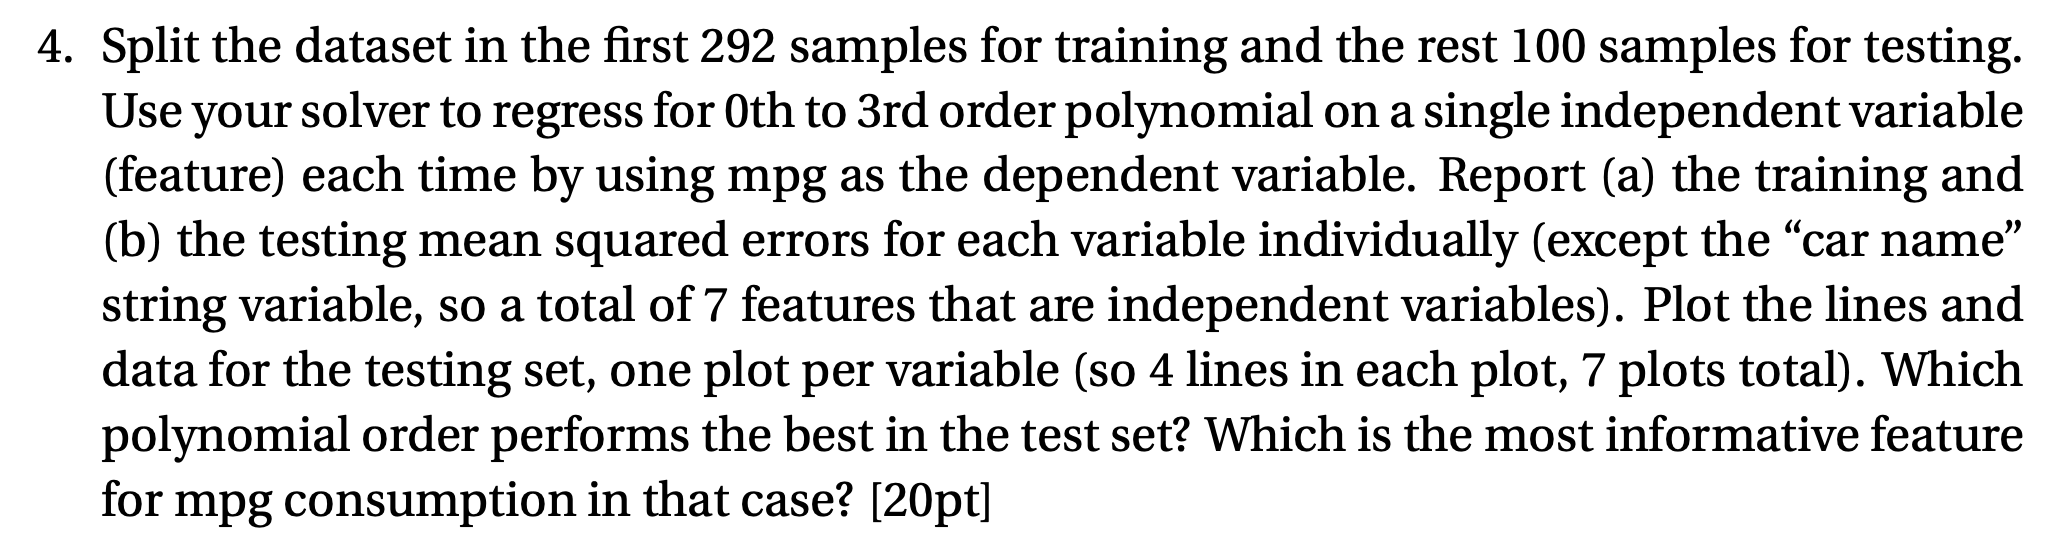

/tmp/ipython-input-3009589302.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(



=== Feature: cylinders ===
Degree 0: Train MSE = 38.615, Test MSE = 156.748
Degree 1: Train MSE = 12.448, Test MSE = 74.645
Degree 2: Train MSE = 12.272, Test MSE = 74.011
Degree 3: Train MSE = 10.956, Test MSE = 68.810


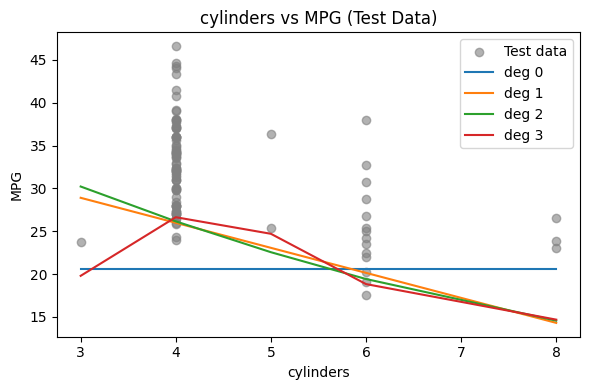


=== Feature: displacement ===
Degree 0: Train MSE = 38.615, Test MSE = 156.748
Degree 1: Train MSE = 10.758, Test MSE = 70.554
Degree 2: Train MSE = 8.930, Test MSE = 65.083
Degree 3: Train MSE = 20.766, Test MSE = 87.077


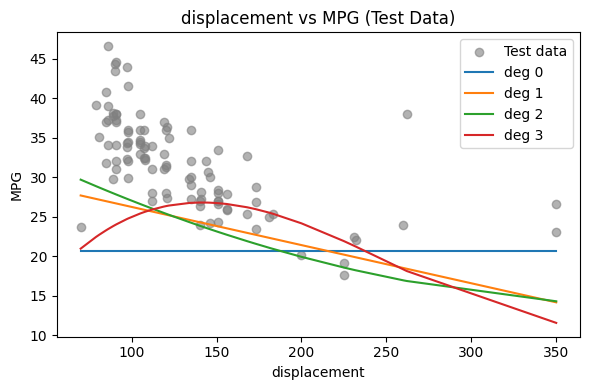


=== Feature: horsepower ===
Degree 0: Train MSE = 38.615, Test MSE = 156.748
Degree 1: Train MSE = 13.818, Test MSE = 73.436
Degree 2: Train MSE = 10.375, Test MSE = 60.108
Degree 3: Train MSE = 16.643, Test MSE = 80.118


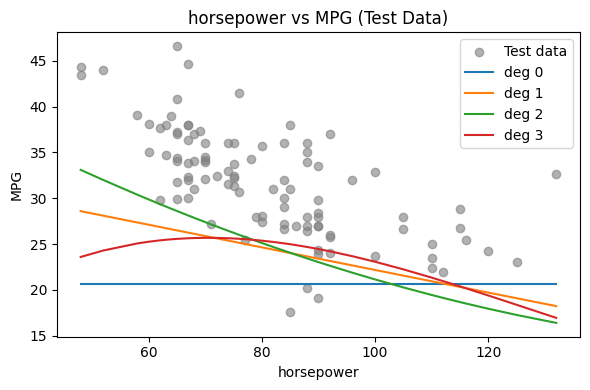


=== Feature: weight ===
Degree 0: Train MSE = 38.615, Test MSE = 156.748
Degree 1: Train MSE = 8.244, Test MSE = 67.485
Degree 2: Train MSE = 23.551, Test MSE = 98.291
Degree 3: Train MSE = 65.169, Test MSE = 196.603


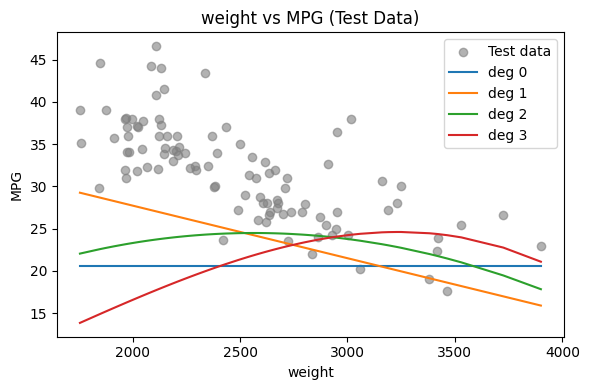


=== Feature: acceleration ===
Degree 0: Train MSE = 38.615, Test MSE = 156.748
Degree 1: Train MSE = 30.035, Test MSE = 131.573
Degree 2: Train MSE = 29.320, Test MSE = 131.446
Degree 3: Train MSE = 29.059, Test MSE = 136.820


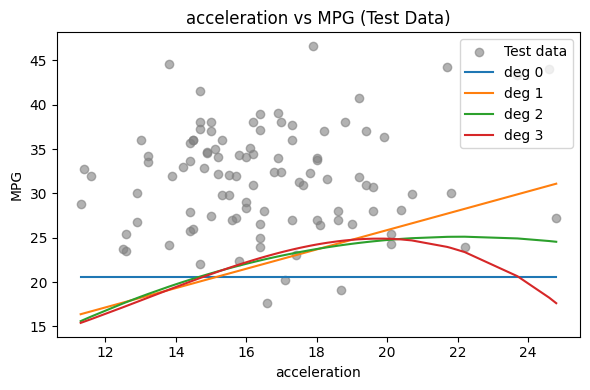


=== Feature: model_year ===
Degree 0: Train MSE = 38.615, Test MSE = 156.748
Degree 1: Train MSE = 36.090, Test MSE = 88.533
Degree 2: Train MSE = 36.090, Test MSE = 88.144
Degree 3: Train MSE = 36.088, Test MSE = 90.008


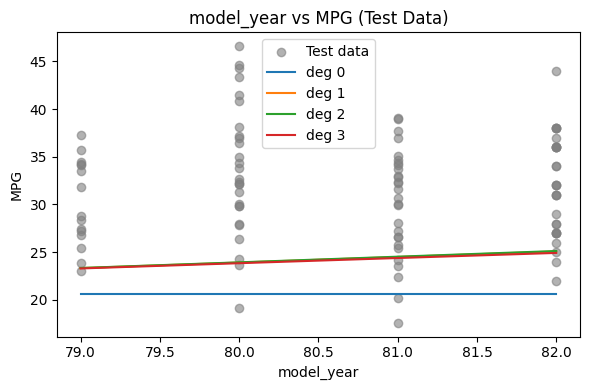


=== Feature: origin ===
Degree 0: Train MSE = 38.615, Test MSE = 156.748
Degree 1: Train MSE = 24.285, Test MSE = 112.092
Degree 2: Train MSE = 23.242, Test MSE = 113.833
Degree 3: Train MSE = 23.242, Test MSE = 113.833


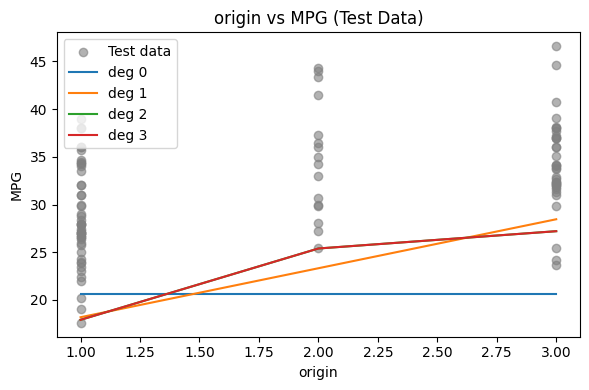


Best Performing Model:
feature      horsepower
degree                2
train_mse     10.374839
test_mse      60.107683
Name: 10, dtype: object


In [4]:
# ============================================================
# ECS 171 – Homework 1
# Question 4: Polynomial Regression (0th–3rd) on Each Variable
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------------
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

data = pd.read_csv(
    "auto-mpg.data",
    delim_whitespace=True,
    names=column_names,
    na_values='?'
)
data = data.dropna().reset_index(drop=True)

# ------------------------------------------------------------
# 2. Polynomial Regression helper functions (from Q3)
# ------------------------------------------------------------
def polynomial_features(x, degree):
    X = np.ones((len(x), degree + 1))
    for d in range(1, degree + 1):
        X[:, d] = x ** d
    return X

def linear_regression_ols(X, y):
    XTX_inv = np.linalg.pinv(X.T @ X)
    w = XTX_inv @ X.T @ y
    return w

def predict(X, w):
    return X @ w

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# ------------------------------------------------------------
# 3. Train/Test split
# ------------------------------------------------------------
train = data.iloc[:292]
test = data.iloc[292:]

y_train = train['mpg'].values
y_test = test['mpg'].values

features = [
    'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin'
]

results = []

# ------------------------------------------------------------
# 4. Loop over features and polynomial degrees
# ------------------------------------------------------------
for feature in features:
    x_train = train[feature].values
    x_test = test[feature].values

    print(f"\n=== Feature: {feature} ===")
    feature_results = []

    for degree in range(4):  # 0th, 1st, 2nd, 3rd
        # Design matrices
        X_train = polynomial_features(x_train, degree)
        X_test = polynomial_features(x_test, degree)

        # Fit model
        w = linear_regression_ols(X_train, y_train)

        # Predictions
        y_pred_train = predict(X_train, w)
        y_pred_test = predict(X_test, w)

        # MSE
        mse_train = mse(y_train, y_pred_train)
        mse_test = mse(y_test, y_pred_test)

        feature_results.append((degree, mse_train, mse_test))
        results.append((feature, degree, mse_train, mse_test))

        print(f"Degree {degree}: Train MSE = {mse_train:.3f}, Test MSE = {mse_test:.3f}")

    # --------------------------------------------------------
    # 5. Plot for each feature (test data)
    # --------------------------------------------------------
    plt.figure(figsize=(6,4))
    plt.scatter(x_test, y_test, color='gray', alpha=0.6, label='Test data')

    sort_idx = np.argsort(x_test)
    for degree in range(4):
        X_test_plot = polynomial_features(x_test, degree)
        w = linear_regression_ols(polynomial_features(x_train, degree), y_train)
        y_pred_plot = predict(X_test_plot, w)
        plt.plot(x_test[sort_idx], y_pred_plot[sort_idx], label=f"deg {degree}")

    plt.title(f"{feature} vs MPG (Test Data)")
    plt.xlabel(feature)
    plt.ylabel("MPG")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 6. Find best-performing feature & order
# ------------------------------------------------------------
results_df = pd.DataFrame(results, columns=['feature', 'degree', 'train_mse', 'test_mse'])
best_row = results_df.loc[results_df['test_mse'].idxmin()]

print("\nBest Performing Model:")
print(best_row)


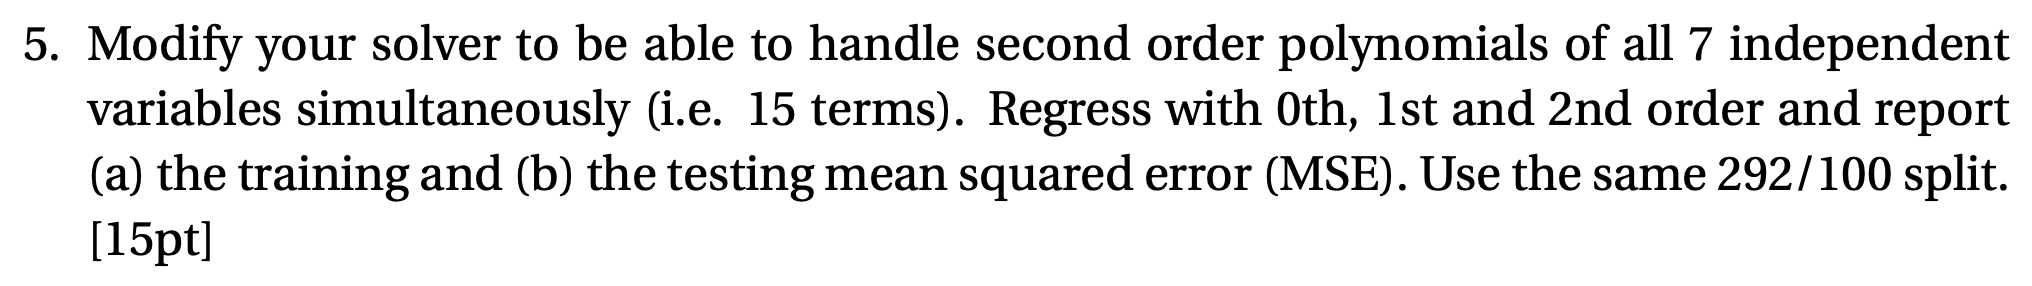

Degree 0:
  Train MSE = 38.6153
  Test  MSE = 156.7484

Degree 1:
  Train MSE = 6.7502
  Test  MSE = 36.9744

Degree 2:
  Train MSE = 4.5583
  Test  MSE = 31.9647



/tmp/ipython-input-1307163441.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


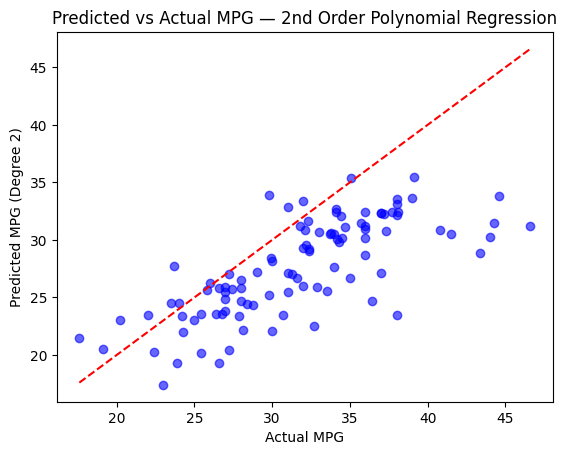

In [5]:
# ============================================================
# ECS 171 – Homework 1
# Question 5: Multivariate Polynomial Regression (0th–2nd)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------------
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

data = pd.read_csv(
    "auto-mpg.data",
    delim_whitespace=True,
    names=column_names,
    na_values='?'
)
data = data.dropna().reset_index(drop=True)

# Train/test split
train = data.iloc[:292]
test = data.iloc[292:]

X_train_raw = train[['cylinders', 'displacement', 'horsepower',
                     'weight', 'acceleration', 'model_year', 'origin']].values
y_train = train['mpg'].values

X_test_raw = test[['cylinders', 'displacement', 'horsepower',
                   'weight', 'acceleration', 'model_year', 'origin']].values
y_test = test['mpg'].values

# ------------------------------------------------------------
# 2. Polynomial feature builder (multivariate)
# ------------------------------------------------------------
def build_poly_features(X, degree):
    """
    Build polynomial features up to 'degree' (without cross terms).
    X: [n_samples, n_features]
    degree: 0, 1, or 2
    Returns design matrix with bias term included.
    """
    n_samples, n_features = X.shape

    if degree == 0:
        return np.ones((n_samples, 1))

    elif degree == 1:
        return np.hstack([np.ones((n_samples, 1)), X])

    elif degree == 2:
        # Bias + linear + squared terms (no interactions)
        X_squared = X ** 2
        return np.hstack([np.ones((n_samples, 1)), X, X_squared])

    else:
        raise ValueError("Only degrees 0–2 supported")

# ------------------------------------------------------------
# 3. Linear Regression OLS (reuse)
# ------------------------------------------------------------
def linear_regression_ols(X, y):
    XTX_inv = np.linalg.pinv(X.T @ X)
    w = XTX_inv @ X.T @ y
    return w

def predict(X, w):
    return X @ w

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# ------------------------------------------------------------
# 4. Fit and evaluate for degrees 0–2
# ------------------------------------------------------------
for degree in [0, 1, 2]:
    X_train = build_poly_features(X_train_raw, degree)
    X_test = build_poly_features(X_test_raw, degree)

    w = linear_regression_ols(X_train, y_train)

    y_pred_train = predict(X_train, w)
    y_pred_test = predict(X_test, w)

    train_mse = mse(y_train, y_pred_train)
    test_mse = mse(y_test, y_pred_test)

    print(f"Degree {degree}:")
    print(f"  Train MSE = {train_mse:.4f}")
    print(f"  Test  MSE = {test_mse:.4f}\n")

# ------------------------------------------------------------
# 5. (Optional) Visualize predicted vs actual MPG
# ------------------------------------------------------------
y_pred_best = predict(build_poly_features(X_test_raw, 2),
                      linear_regression_ols(build_poly_features(X_train_raw, 2), y_train))

plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG (Degree 2)")
plt.title("Predicted vs Actual MPG — 2nd Order Polynomial Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


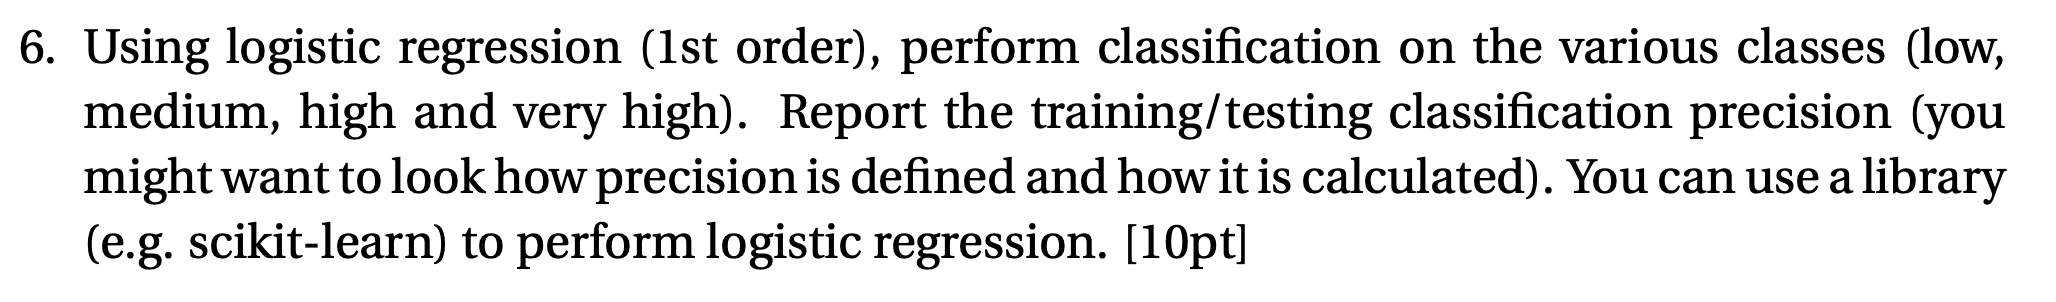

In [7]:
# ============================================================
# ECS 171 – Homework 1
# Question 6: Logistic Regression Classification (1st Order)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report
from sklearn.preprocessing import LabelEncoder

# ------------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------------
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

data = pd.read_csv(
    "auto-mpg.data",
    delim_whitespace=True,
    names=column_names,
    na_values='?'
)
data = data.dropna().reset_index(drop=True)

# ------------------------------------------------------------
# 2. Create 4 mpg categories (same as Q1/Q2)
# ------------------------------------------------------------
data['mpg_category'] = pd.qcut(
    data['mpg'],
    4,
    labels=['low', 'medium', 'high', 'very high']
)

# Encode labels as integers for sklearn
label_encoder = LabelEncoder()
data['mpg_category_encoded'] = label_encoder.fit_transform(data['mpg_category'])

# ------------------------------------------------------------
# 3. Train/Test split (same 292/100)
# ------------------------------------------------------------
train = data.iloc[:292]
test = data.iloc[292:]

X_train = train[['cylinders', 'displacement', 'horsepower',
                 'weight', 'acceleration', 'model_year', 'origin']].values
y_train = train['mpg_category_encoded'].values

X_test = test[['cylinders', 'displacement', 'horsepower',
               'weight', 'acceleration', 'model_year', 'origin']].values
y_test = test['mpg_category_encoded'].values

# ------------------------------------------------------------
# 4. Logistic Regression (1st order)
# ------------------------------------------------------------
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

# ------------------------------------------------------------
# 5. Predictions & Precision
# ------------------------------------------------------------
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Macro-average precision (average of class-wise precision)
precision_train = precision_score(y_train, y_pred_train, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')

print(f"Training Precision: {precision_train:.4f}")
print(f"Testing Precision:  {precision_test:.4f}\n")

# Optional detailed report
print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))


/tmp/ipython-input-1151627129.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Precision: 0.8094
Testing Precision:  0.4343

Classification Report (Test Data):
              precision    recall  f1-score   support

        high       0.49      0.61      0.54        31
         low       0.00      0.00      0.00         0
      medium       0.25      1.00      0.40         5
   very high       1.00      0.62      0.77        64

    accuracy                           0.64       100
   macro avg       0.43      0.56      0.43       100
weighted avg       0.80      0.64      0.68       100



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. 

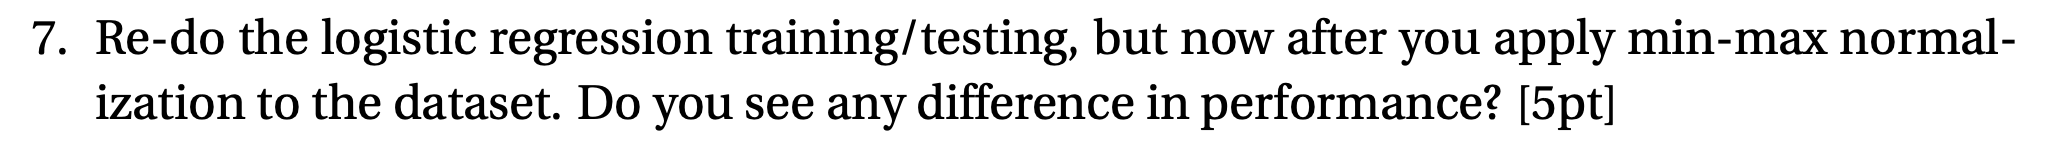

In [8]:
# ============================================================
# ECS 171 – Homework 1
# Question 7: Logistic Regression with Min–Max Normalization
# ============================================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import precision_score, classification_report

# ------------------------------------------------------------
# 1. Load and prepare dataset (same as Q6)
# ------------------------------------------------------------
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

data = pd.read_csv(
    "auto-mpg.data",
    sep=r"\s+",
    names=column_names,
    na_values='?'
)
data = data.dropna().reset_index(drop=True)

# Create 4 mpg categories
data['mpg_category'] = pd.qcut(
    data['mpg'],
    4,
    labels=['low', 'medium', 'high', 'very high']
)

# Encode target
label_encoder = LabelEncoder()
data['mpg_category_encoded'] = label_encoder.fit_transform(data['mpg_category'])

# ------------------------------------------------------------
# 2. Train/test split (same 292/100 split)
# ------------------------------------------------------------
train = data.iloc[:292]
test = data.iloc[292:]

X_train = train[['cylinders','displacement','horsepower',
                 'weight','acceleration','model_year','origin']].values
y_train = train['mpg_category_encoded'].values

X_test = test[['cylinders','displacement','horsepower',
               'weight','acceleration','model_year','origin']].values
y_test = test['mpg_category_encoded'].values

# ------------------------------------------------------------
# 3. Apply Min–Max normalization (fit on train only)
# ------------------------------------------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 4. Logistic Regression (same parameters as Q6)
# ------------------------------------------------------------
model = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

precision_train = precision_score(y_train, y_pred_train, average='macro')
precision_test = precision_score(y_test, y_pred_test, average='macro')

print(f"Training Precision (normalized): {precision_train:.4f}")
print(f"Testing Precision  (normalized): {precision_test:.4f}\n")

print("Classification Report (Test Data):")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))


Training Precision (normalized): 0.7449
Testing Precision  (normalized): 0.2728

Classification Report (Test Data):
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        31
         low       0.00      0.00      0.00         0
      medium       0.11      1.00      0.20         5
   very high       0.98      0.77      0.86        64

    accuracy                           0.54       100
   macro avg       0.27      0.44      0.26       100
weighted avg       0.63      0.54      0.56       100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


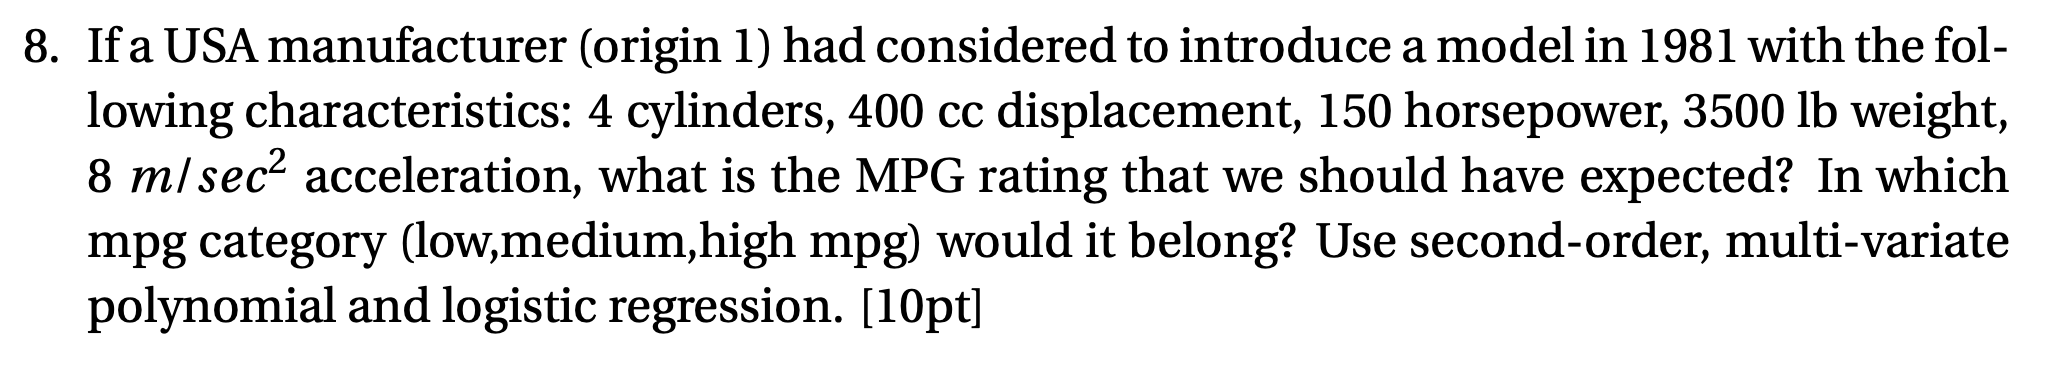

In [10]:
# ============================================================
# ECS 171 – Homework 1
# Question 8: Predict 1981 Model's MPG and Category
# ============================================================

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# ------------------------------------------------------------
# 1. Load and prepare dataset
# ------------------------------------------------------------
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

data = pd.read_csv(
    "auto-mpg.data",
    sep=r"\s+",
    names=column_names,
    na_values='?'
)
data = data.dropna().reset_index(drop=True)

# mpg category bins (same as before)
data['mpg_category'] = pd.qcut(
    data['mpg'],
    4,
    labels=['low', 'medium', 'high', 'very high']
)
label_encoder = LabelEncoder()
data['mpg_category_encoded'] = label_encoder.fit_transform(data['mpg_category'])

# Train/test split (same 292/100)
train = data.iloc[:292]
test = data.iloc[292:]

X_train_raw = train[['cylinders','displacement','horsepower',
                     'weight','acceleration','model_year','origin']].values
y_train_reg = train['mpg'].values
y_train_clf = train['mpg_category_encoded'].values

X_test_raw = test[['cylinders','displacement','horsepower',
                   'weight','acceleration','model_year','origin']].values
y_test_reg = test['mpg'].values
y_test_clf = test['mpg_category_encoded'].values

# ------------------------------------------------------------
# 2.  Second-order polynomial regression (from Q5)
# ------------------------------------------------------------
def build_poly_features(X, degree):
    n_samples, n_features = X.shape
    if degree == 0:
        return np.ones((n_samples, 1))
    elif degree == 1:
        return np.hstack([np.ones((n_samples, 1)), X])
    elif degree == 2:
        X_squared = X ** 2
        return np.hstack([np.ones((n_samples, 1)), X, X_squared])
    else:
        raise ValueError("Only degrees 0–2 supported")

def linear_regression_ols(X, y):
    XTX_inv = np.linalg.pinv(X.T @ X)
    w = XTX_inv @ X.T @ y
    return w

def predict(X, w):
    return X @ w

# Train 2nd-order regression
X_train_poly = build_poly_features(X_train_raw, 2)
w = linear_regression_ols(X_train_poly, y_train_reg)

# ------------------------------------------------------------
# 3.  Logistic regression classifier (normalized, from Q7)
# ------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)

log_reg = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)
log_reg.fit(X_train_scaled, y_train_clf)

# ------------------------------------------------------------
# 4.  Predict new car
# ------------------------------------------------------------
new_car = np.array([[4, 400, 150, 3500, 8, 81, 1]])

# --- Regression prediction ---
X_new_poly = build_poly_features(new_car, 2)
mpg_pred = predict(X_new_poly, w)[0]

# --- Logistic classification ---
new_car_scaled = scaler.transform(new_car)
cat_pred_encoded = log_reg.predict(new_car_scaled)[0]
cat_pred = label_encoder.inverse_transform([cat_pred_encoded])[0]

print(f"Predicted MPG (2nd-order regression): {mpg_pred:.2f}")
print(f"Predicted MPG Category (logistic regression): {cat_pred}")


Predicted MPG (2nd-order regression): 18.61
Predicted MPG Category (logistic regression): medium
